In [3]:
import xarray as xr
import matplotlib.pyplot as plt
import geopandas as gpd
from jupyterthemes import jtplot
import luit as lt

jtplot.style(theme='grade3')

In [4]:
#User-supplied
summaoutfile = '/glade/p/work/manab/fcast/PNW/output/newsumma/final.nc'   #Output file from SUMMA
#routefile = '/glade/p/work/manab/fcast/PNW_route/output/q_out.nc'       #Output file from MizuRoute
polyshp = '/glade/p/work/manab/fcast/data/shapefile/Region_17_merged_hru.shp'  #Polygon shapefile
segshp =  '/glade/p/work/manab/fcast/data/shapefile/Region17_merged_seg.shp'   #Segment shapefile

In [5]:
summaout = xr.open_dataset(summaoutfile)        #Imports the SUMMA outfile
hrus = summaout['hruId'].values
print(hrus)

[17000001 17000002 17000003 ..., 17906164 17906165 17906166]


In [8]:
polydat = gpd.read_file(polyshp)                #Imports the polygon shapefile
polydat.head(4)

,OBJECTID,POI_ID,PROD_UNIT,hru_elev,hru_id2,Y_Centroid,X_Centroid,Basin_Area,seg_hru_id,Elev_Avg,Lon_Centro,Lat_Centro,geometry
0,1,23336004,17a,1829.0,17000001,2.213807e+06,-1.665466e+06,1.202901e+08,17001133,1890.24521,-116.20479,41.33139,POLYGON ((-1661303.114800001 2221244.977600001...
1,2,23198872,17a,1902.0,17000002,2.214667e+06,-1.555784e+06,1.248356e+08,17000804,1959.87124,-114.91219,41.53916,"(POLYGON ((-1532954.8961 2215904.7739, -153295..."
2,3,23198872,17a,1876.0,17000003,2.216264e+06,-1.540583e+06,1.017145e+08,17000804,1908.59643,-114.73603,41.57988,"POLYGON ((-1532985.250399999 2215875.1151, -15..."
3,4,23196836,17a,2000.0,17000004,2.223289e+06,-1.537504e+06,1.258380e+08,17000798,2006.02425,-114.71614,41.64682,"POLYGON ((-1546064.8598 2230034.8353, -1546065..."


In [ ]:
segdat = gpd.read_file(segshp)                  #Imports the segment shapefile
print(segdat)

In [1]:
dx = polydat[polydat.hru_id2.isin(hrus)]
print(dx)

NameError: name 'gpd' is not defined

In [14]:
polydat

,OBJECTID,POI_ID,PROD_UNIT,hru_elev,hru_id2,Y_Centroid,X_Centroid,Basin_Area,seg_hru_id,Elev_Avg,Lon_Centro,Lat_Centro,geometry
0,1,23336004,17a,1829.0,17000001,2.213807e+06,-1.665466e+06,1.202901e+08,17001133,1890.24521,-116.20479,41.33139,POLYGON ((-1661303.114800001 2221244.977600001...
1,2,23198872,17a,1902.0,17000002,2.214667e+06,-1.555784e+06,1.248356e+08,17000804,1959.87124,-114.91219,41.53916,"(POLYGON ((-1532954.8961 2215904.7739, -153295..."
2,3,23198872,17a,1876.0,17000003,2.216264e+06,-1.540583e+06,1.017145e+08,17000804,1908.59643,-114.73603,41.57988,"POLYGON ((-1532985.250399999 2215875.1151, -15..."
3,4,23196836,17a,2000.0,17000004,2.223289e+06,-1.537504e+06,1.258380e+08,17000798,2006.02425,-114.71614,41.64682,"POLYGON ((-1546064.8598 2230034.8353, -1546065..."
4,5,23196800,17a,1662.0,17000005,2.230962e+06,-1.545616e+06,4.630592e+05,17000797,1648.96000,-114.83059,41.69983,"POLYGON ((-1546065.114499999 2230081.0691, -15..."
5,6,23196800,17a,1808.0,17000006,2.228211e+06,-1.542670e+06,1.952573e+07,17000797,1857.98356,-114.78910,41.68090,"POLYGON ((-1537365.0273 2228234.9859, -1537365..."
6,7,23199068,17a,1660.0,17000007,2.231756e+06,-1.546043e+06,8.056152e+05,17000810,1654.54545,-114.83755,41.70603,"POLYGON ((-1545020.8806 2231999.150599999, -15..."
7,8,23176751,17a,2398.0,17000008,2.232500e+06,-1.432425e+06,4.409100e+06,17000767,2442.22222,-113.48705,41.90546,"POLYGON ((-1431704.3084 2233664.9516, -1431704..."
8,9,23176751,17a,2187.0,17000009,2.233833e+06,-1.431560e+06,8.194954e+04,17000767,2188.75000,-113.47970,41.91859,POLYGON ((-1431285.182399999 2233724.936899999...
9,10,23176773,17a,2569.0,17000010,2.233053e+06,-1.429445e+06,4.610477e+06,17000768,2518.62674,-113.45272,41.91519,"POLYGON ((-1428672.812200001 2234144.9187, -14..."


In [13]:
# x =gpd.tools.sjoin(polydat, segdat, how="inner") # Merging


In [ ]:
x.plot(column = 'Elev_Avg', cmap='OrRd', scheme='quantiles')
#segdat.plot()
#x.plot()

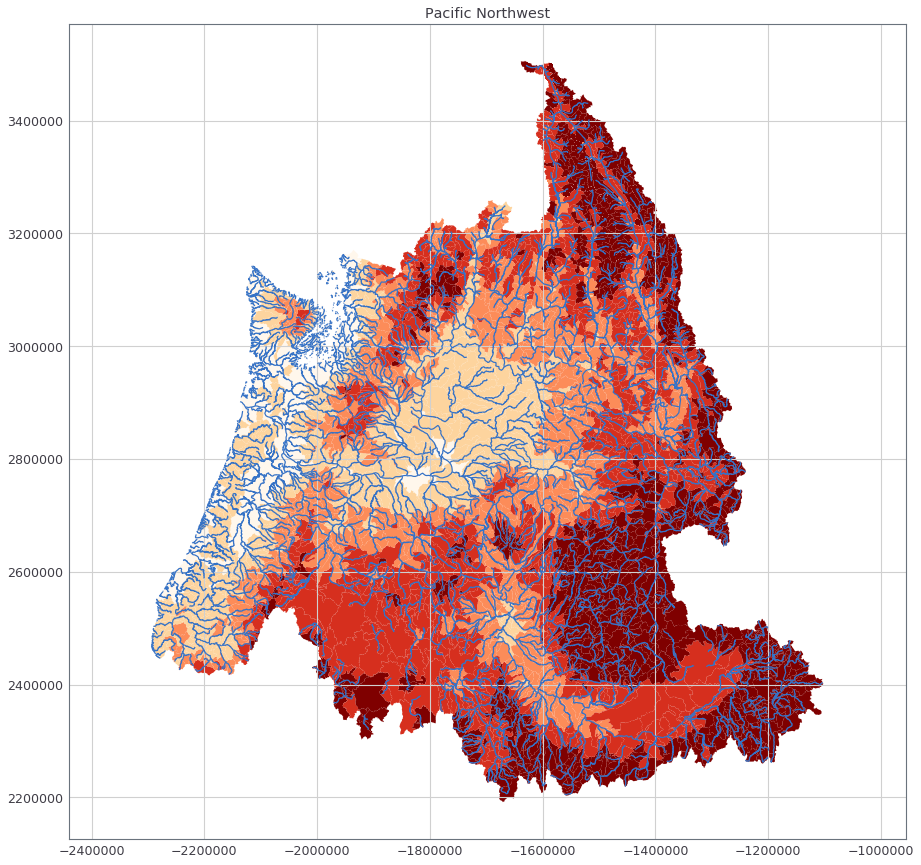

In [41]:
f, ax = plt.subplots(1, figsize=(15, 15))
ax.set_title('Pacific Northwest')
# Other nice categorical color maps (cmap) include 'Set2' and 'Set3'
polydat.plot(ax = ax, column = 'Elev_Avg', cmap='OrRd', scheme='quantiles')
segdat.plot(ax = ax)
ax.set_ylim([-90, 90])
#ax.set_axis_off()
plt.axis('equal');

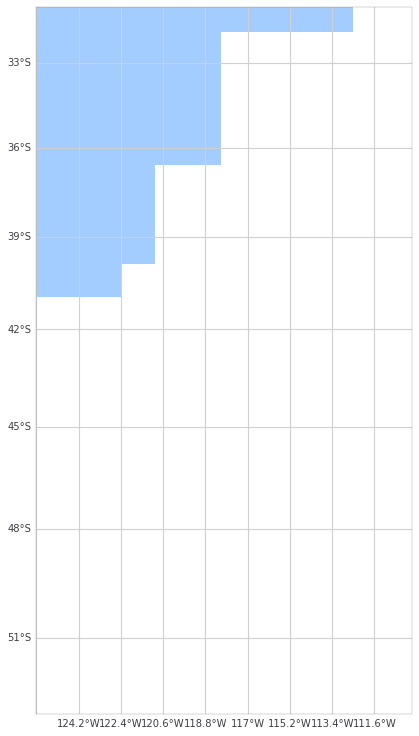

In [42]:
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
from cartopy.io import shapereader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


def make_map(projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(9, 13),
                           subplot_kw=dict(projection=projection))
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return fig, ax



import cartopy.io.img_tiles as cimgt
#extent = [-39, -38.25, -13.25, -12.5]
extent = [-126, -110, -31, -53]

request = cimgt.GoogleTiles()

fig, ax = make_map(projection=request.crs)
ax.set_extent(extent)

ax.add_image(request, 10)